In [1]:
#importing the libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["figure.figsize"] = (20,15)
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df= pd.read_csv('/Users/apple/Downloads/zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.count()

url                            51717
address                        51717
name                           51717
online_order                   51717
book_table                     51717
rate                           43942
votes                          51717
phone                          50509
location                       51696
rest_type                      51490
dish_liked                     23639
cuisines                       51672
approx_cost(for two people)    51371
reviews_list                   51717
menu_item                      51717
listed_in(type)                51717
listed_in(city)                51717
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
#Looking for NAS
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
#Drop Unawanted Columns
zomato=df.drop(['url','address','phone','dish_liked', 'menu_item', 'reviews_list'],axis=1)

In [8]:
zomato

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [9]:
#checking for Duplicated Values
zomato.duplicated().sum()

108

In [10]:
#Droping Duplicates
zomato.drop_duplicates(inplace=True)

In [11]:
zomato

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [12]:
zomato.duplicated().sum()

0

In [13]:
#Droping NAS
zomato = zomato.dropna()

In [14]:
zomato.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

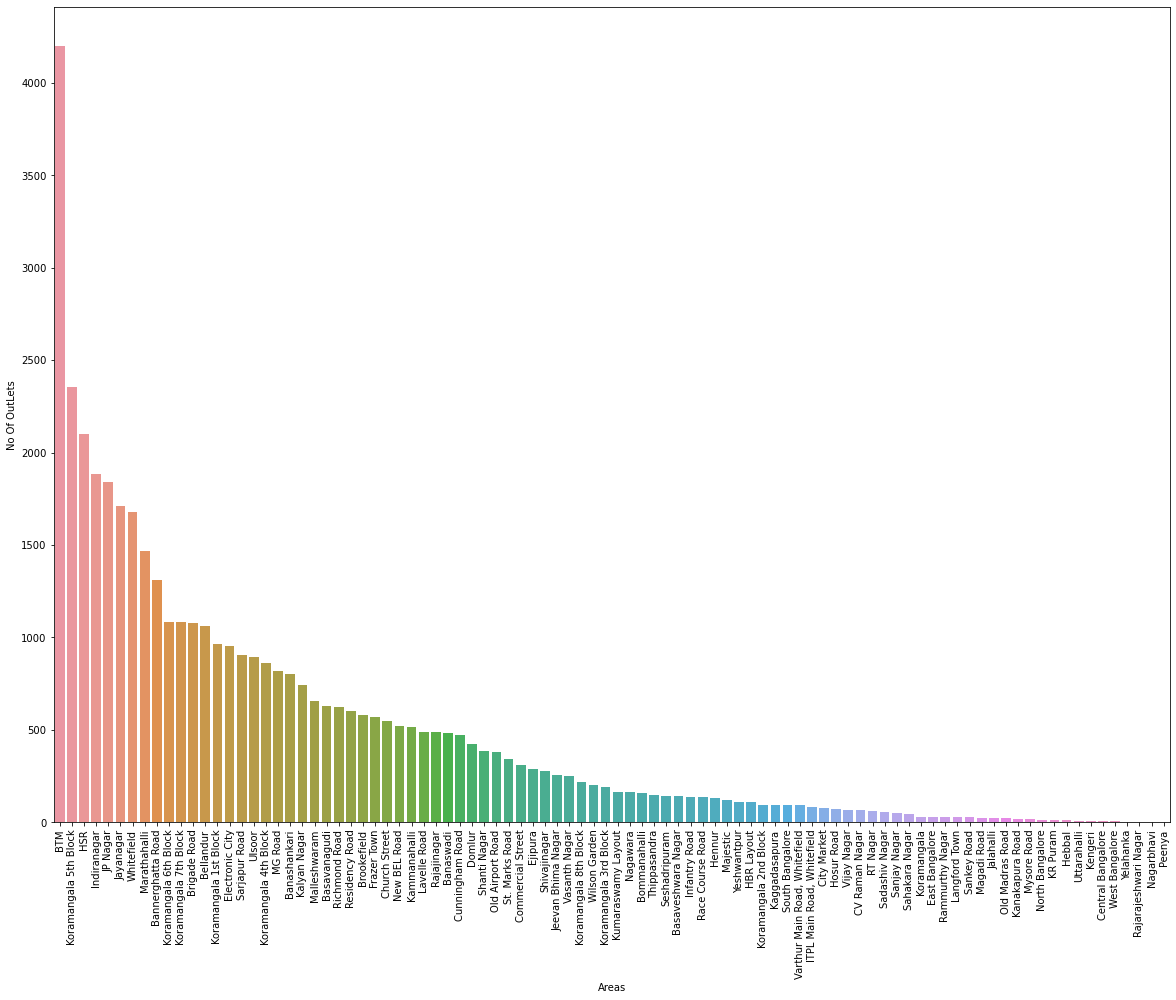

In [15]:
#No Of Outlets based on Location  
OutLet_Num = zomato.location.value_counts()
chart = sns.barplot(x=OutLet_Num.index, y=OutLet_Num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xlabel("Areas")
plt.ylabel("No Of OutLets")
plt.show()


In [16]:
zomato.rest_type.value_counts()

Quick Bites                   14981
Casual Dining                  9859
Cafe                           3487
Dessert Parlor                 1923
Delivery                       1775
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

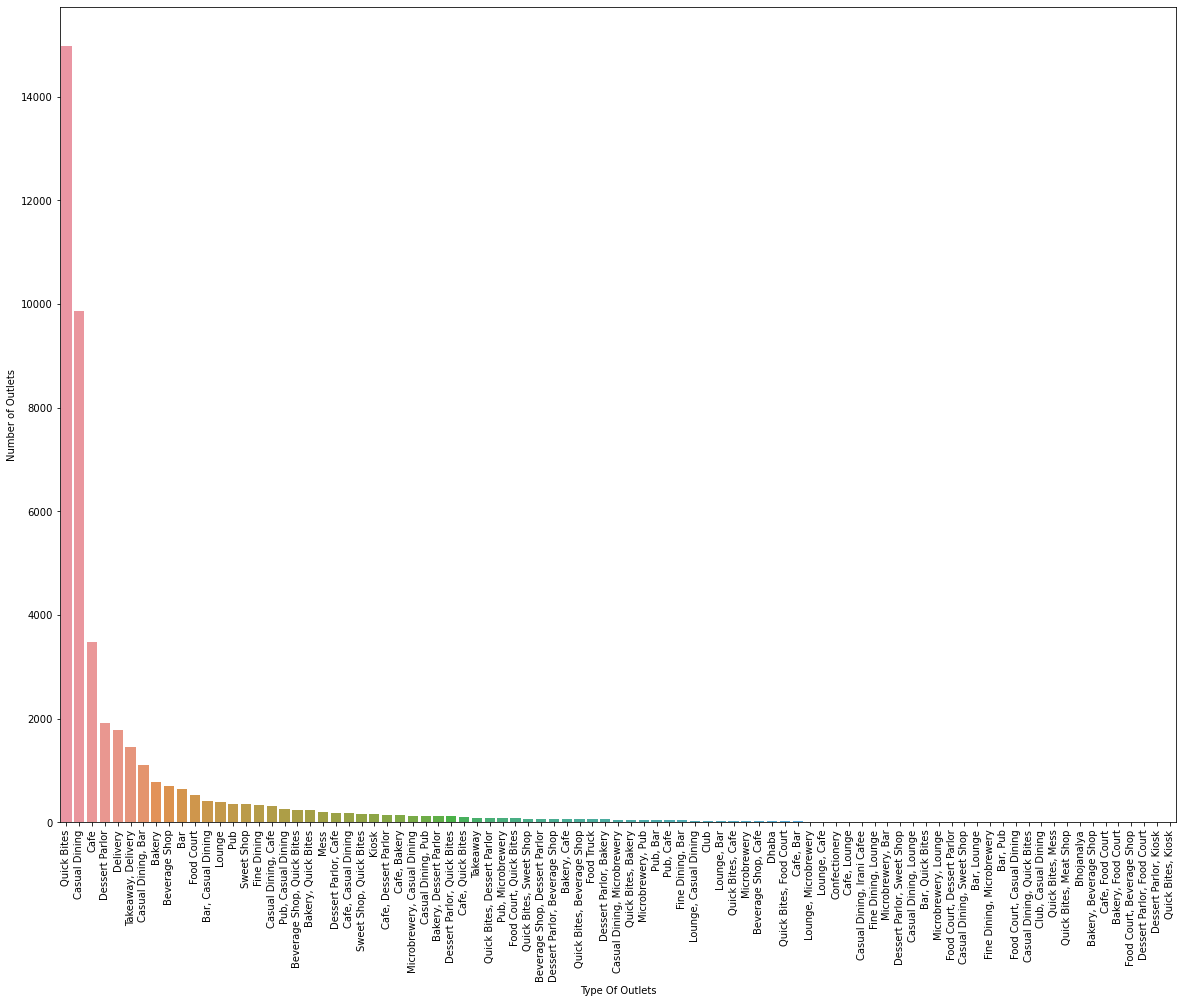

In [17]:
#No of types of Restaurents 
rest_type_num = zomato.rest_type.value_counts()
chart = sns.barplot(x=rest_type_num.index, y=rest_type_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xlabel("Type Of Outlets")
plt.ylabel("Number of Outlets")
plt.show()

In [18]:
zomato.online_order.value_counts()


Yes    28136
No     15311
Name: online_order, dtype: int64

In [19]:
zomato.online_order.count()

43447

<AxesSubplot:>

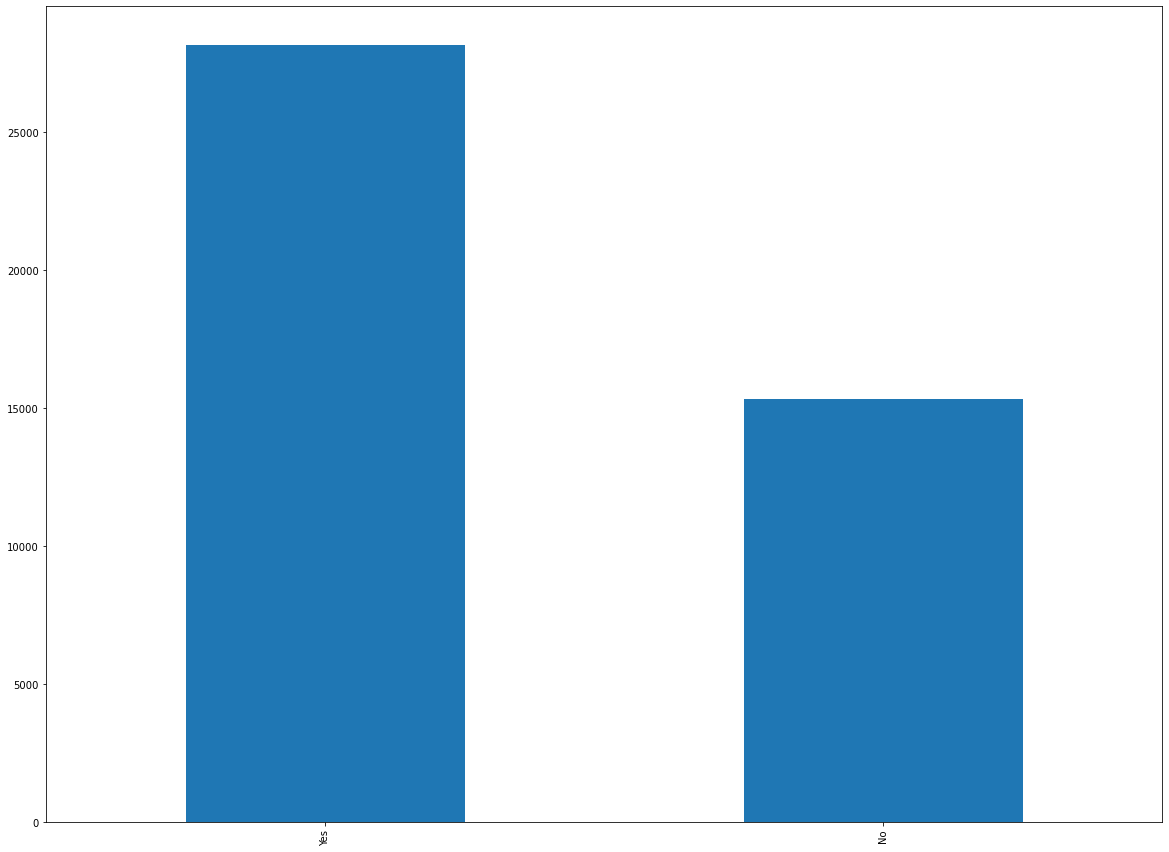

In [20]:
# No of Restaurents providing online orders
zomato.online_order.value_counts().plot(kind='bar')

<AxesSubplot:>

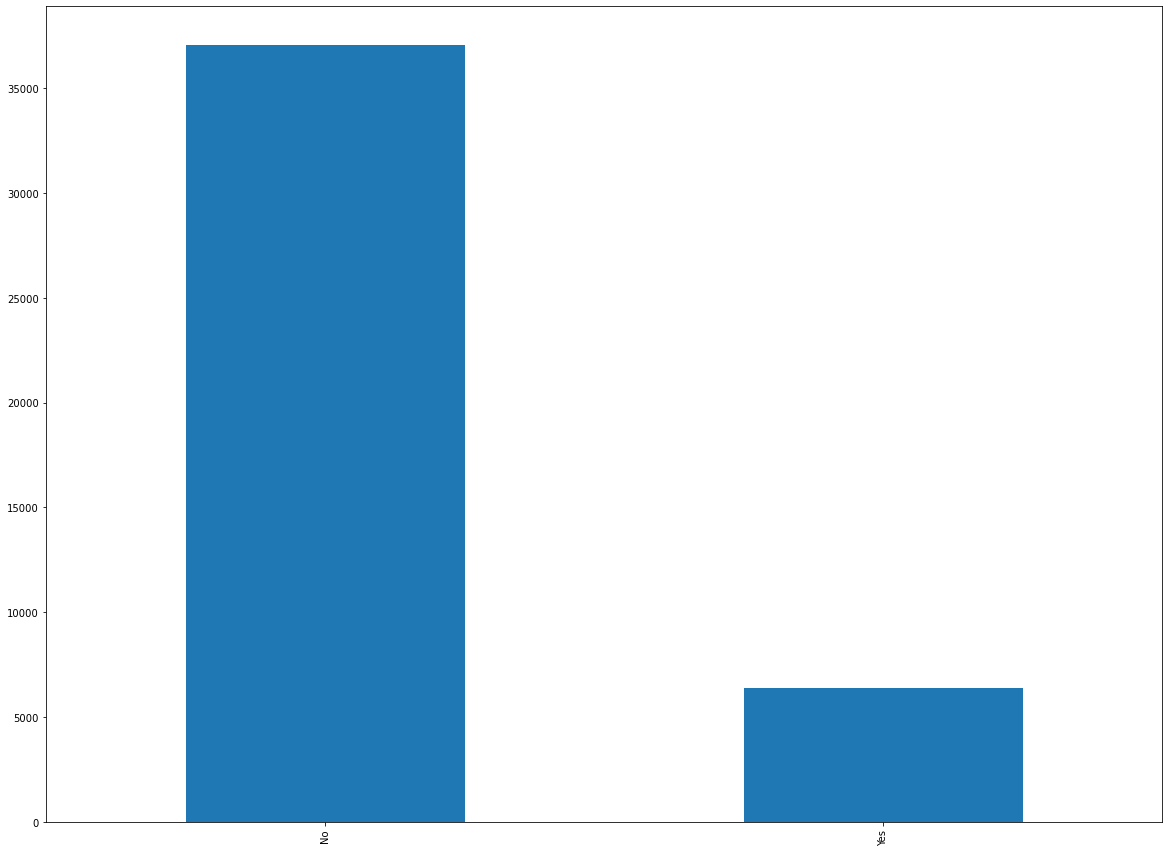

In [21]:
#No of Restaurents providing online Table Reservations
zomato.book_table.value_counts().plot(kind='bar')

In [22]:
zomato.cuisines.value_counts()

North Indian                                                           2241
North Indian, Chinese                                                  2029
South Indian                                                           1317
Bakery, Desserts                                                        642
Biryani                                                                 632
                                                                       ... 
Chinese, Bakery                                                           1
South Indian, Fast Food, Chinese                                          1
Asian, Continental, Healthy Food                                          1
South Indian, North Indian, Chinese, Desserts, Fast Food, Ice Cream       1
North Indian, Chinese, Arabian, Momos                                     1
Name: cuisines, Length: 2487, dtype: int64

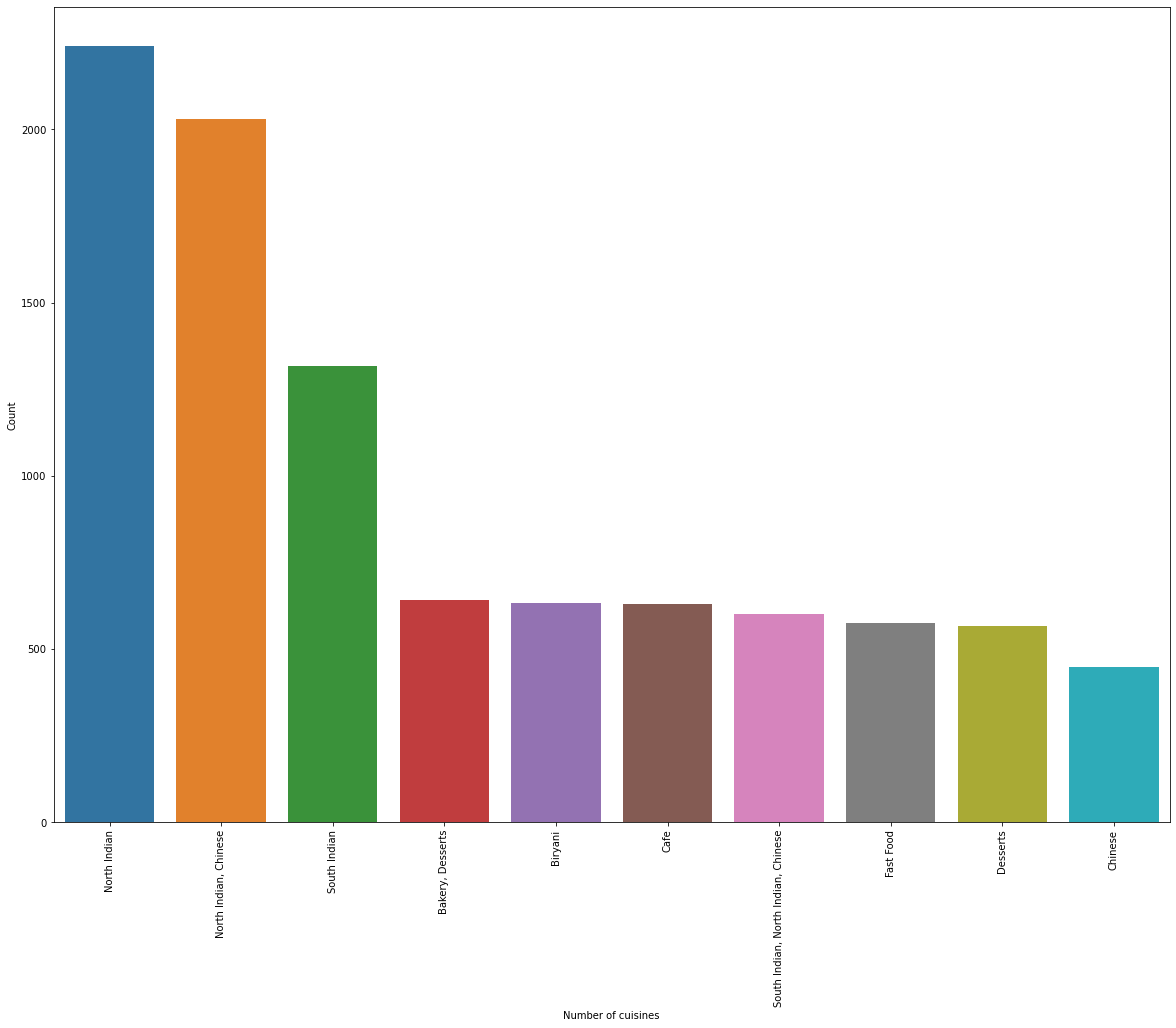

In [23]:
cuisines_num = zomato.cuisines.value_counts()[:10]
chart = sns.barplot(x=cuisines_num.index, y=cuisines_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xlabel("Number of cuisines")
plt.ylabel("Count")
plt.show()

In [24]:
zomato.describe()


,votes
count,43447.000000
mean,333.777430
std,863.748802
min,0.000000
25%,17.000000
50%,64.000000
75%,254.000000
max,16832.000000


In [25]:
zomato

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


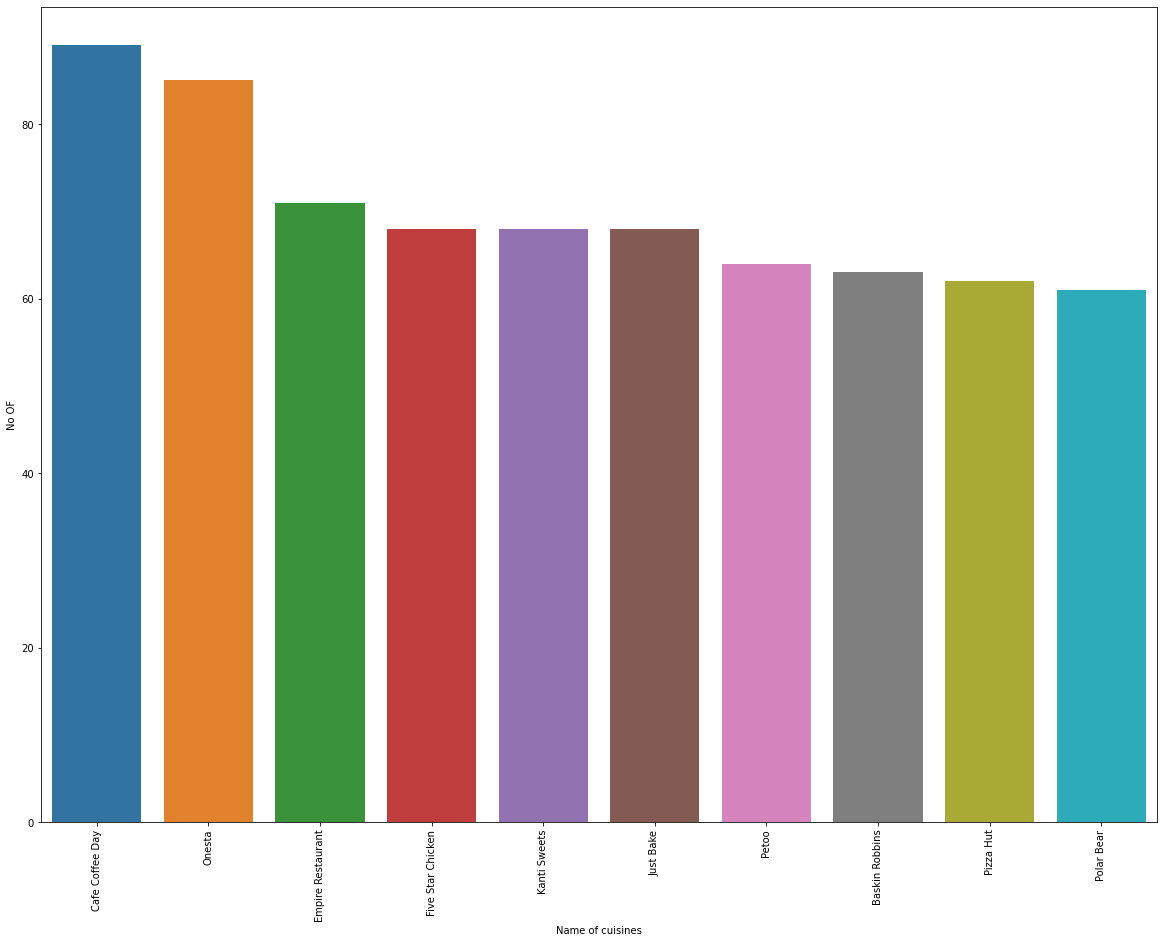

In [26]:
#A No of restaurnts based on type
cuisines_names = zomato.name.value_counts()[:10]
chart = sns.barplot(x=cuisines_names.index, y=cuisines_names)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xlabel("Name of cuisines")
plt.ylabel("No OF")
plt.show()

In [27]:
zomato['rate'].value_counts()

NEW       2192
3.9/5     2088
3.7/5     2006
3.8/5     1997
3.9 /5    1865
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

In [28]:
zomato['rate'] = zomato.rate.apply(lambda x :x.replace('/5',''))

In [29]:
zomato['rate'] = zomato.rate.apply(lambda x :x.replace('-','0.0'))

In [30]:
zomato['rate'] = zomato.rate.apply(lambda x :x.replace('NEW','0.0'))

In [31]:
zomato.rate.value_counts()

0.0     2257
3.9     2088
3.7     2006
3.8     1997
3.9     1865
        ... 
2.2        7
2.0        7
2.0        4
1.8        3
1.8        2
Name: rate, Length: 63, dtype: int64

In [32]:
zomato['rate'] = zomato['rate'].astype(float)

In [33]:
zomato

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [34]:
Zomato_new = zomato[zomato.rate > 4.5][:20]

In [35]:
Zomato_new

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Cafes,Banashankari
44,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Delivery,Banashankari
164,The Blue Wagon - Kitchen,Yes,No,4.6,228,Jayanagar,Cafe,"Cafe, Beverages",400,Delivery,Banashankari
557,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Dine-out,Banashankari
632,Taaza Thindi,No,No,4.7,651,Banashankari,Quick Bites,South Indian,100,Dine-out,Banashankari
868,Barbeque Nation,No,Yes,4.7,3845,JP Nagar,Casual Dining,"North Indian, European, Mediterranean, BBQ, Kebab","1,600",Buffet,Bannerghatta Road
1035,Galito's,Yes,No,4.6,404,Bannerghatta Road,Casual Dining,"African, Burger","1,000",Delivery,Bannerghatta Road
2242,Barbeque Nation,No,Yes,4.7,3844,JP Nagar,Casual Dining,"North Indian, European, Mediterranean, BBQ, Kebab","1,600",Dine-out,Bannerghatta Road
2246,Hunger Camp,No,Yes,4.6,311,JP Nagar,Casual Dining,"North Indian, South Indian, Chinese, Seafood","1,300",Dine-out,Bannerghatta Road
2497,Onesta,Yes,Yes,4.6,1755,Basavanagudi,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Cafes,Basavanagudi


In [36]:
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)

In [37]:
zomato

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,False,False,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield
51711,Bhagini,False,False,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,False,False,3.6,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [38]:
def Encode(zomato_df):
    for column in zomato_df.columns[~zomato_df.columns.isin(['rate', 'cost', 'votes'])]:
        zomato_df[column] = zomato_df[column].factorize()[0]
    return zomato_df

zomato_en = Encode(zomato.copy())
zomato_en.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,0,0,0,4.1,775,0,0,0,0,0,0
1,1,0,1,4.1,787,0,0,1,0,0,0
2,2,0,1,3.8,918,0,1,2,0,0,0
3,3,1,1,3.7,88,0,2,3,1,0,0
4,4,1,1,3.8,166,1,0,4,2,0,0


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

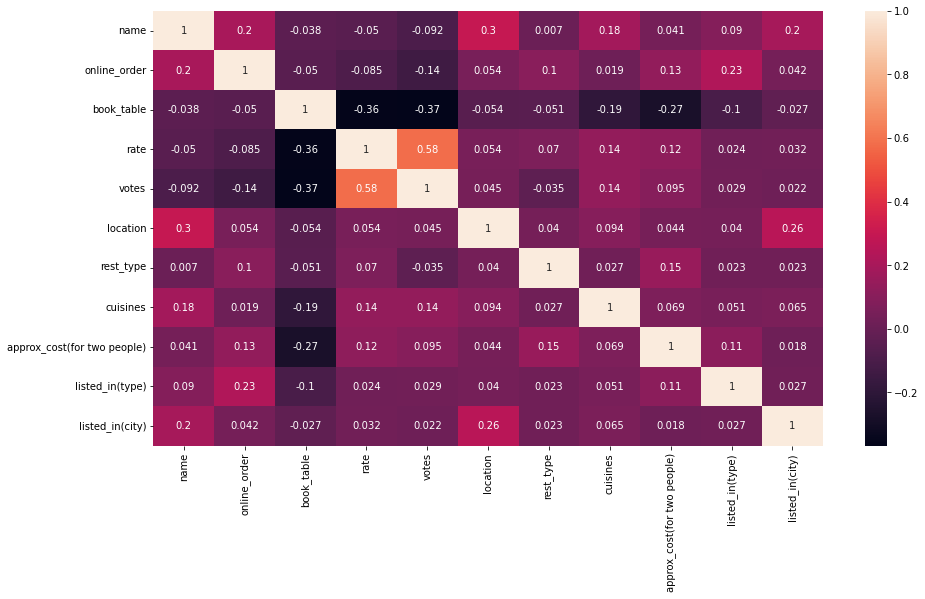

In [39]:
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato_en.columns

Text(0.5, 1.0, 'Type of Service')

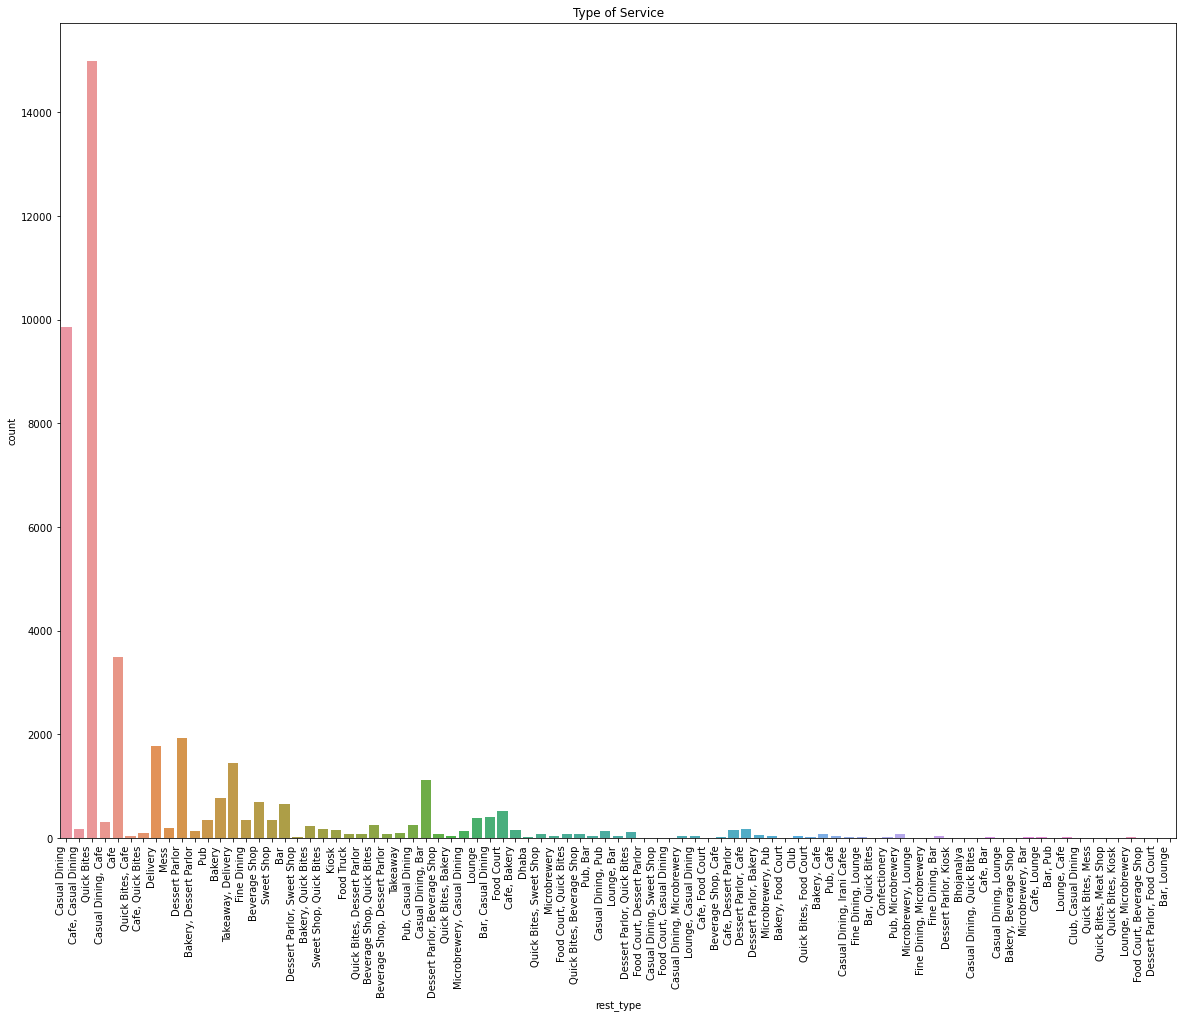

In [40]:
sns.countplot(zomato['rest_type'])
sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(20,15)
plt.title('Type of Service')

In [46]:
# Most Popular Restaurants with Location Based and with Highest Rated.!
pd.pivot_table(zomato, index = ['name','location'], values = 'rate').sort_values('location', ascending = True)

,,rate
name,location,
Andhra Kitchen,BTM,4.014286
Juice Lounge,BTM,3.100000
Juice Shop,BTM,3.537500
Chai Makhan,BTM,0.000000
Just Bake,BTM,3.300000
...,...,...
Fujian Express,Yeshwantpur,3.300000
Tasty Box,Yeshwantpur,2.900000
Snack Magic,Yeshwantpur,3.700000


In [45]:
# Most Popular Restaurants with number off Votes and with Highest Rated.!
pd.pivot_table(zomato, index = ['name','votes'], values = 'rate').sort_values('votes', ascending = False)

rate
name                        votes      
Byg Brewski Brewing Company 16832   4.9
                            16345   4.9
Toit                        14956   4.7
Truffles                    14726   4.7
                            14723   4.7
...                                 ...
Foodzoo                     0       0.0
Basveshwara Khaanavali      0       0.0
Paradise                    0       0.0
Stop N Joy                  0       0.0
Empire Restaurant           0       0.0

[16755 rows x 1 columns]